## Import libraries and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_spss("final_data.sav")

## Take a look at the data

In [31]:
df.head()

,name,age,age_group,sex,Mechanism,Injury,Shoulder,Humeros,elbow,forearm,...,Lumbar,shulderinjury,femorshaft,infant,fallstanding,Hand_injury,pelvis,pelvis_injury,knee_injury,foot_ingury
0,9,NaN,NaN,male,MVA,lower,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,بدون اسیب,NaN,بدون اسیب,بدون اسیب,بدون اسیب
1,10,NaN,NaN,male,fall standing,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,fall standing,بدون اسیب,NaN,بدون اسیب,بدون اسیب,بدون اسیب
2,7,1.0,0-9,male,direct,up,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0-9,NaN,بدون اسیب,NaN,بدون اسیب,بدون اسیب,بدون اسیب
3,8,1.0,0-9,male,fall standing,NaN,NaN,NaN,supra condyle fx,NaN,...,NaN,NaN,NaN,0-9,fall standing,بدون اسیب,NaN,بدون اسیب,بدون اسیب,بدون اسیب
4,8,1.0,0-9,male,fall standing,NaN,Dislocate,NaN,NaN,NaN,...,NaN,shulder injury,NaN,0-9,fall standing,بدون اسیب,NaN,بدون اسیب,بدون اسیب,بدون اسیب


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           2480 non-null   object  
 1   age            2478 non-null   float64 
 2   age_group      2478 non-null   category
 3   sex            2480 non-null   category
 4   Mechanism      2361 non-null   category
 5   Injury         333 non-null    category
 6   Shoulder       113 non-null    category
 7   Humeros        68 non-null     category
 8   elbow          182 non-null    category
 9   forearm        233 non-null    category
 10  Wrist          333 non-null    category
 11  hand           358 non-null    category
 12  Femor          142 non-null    category
 13  Knee           81 non-null     category
 14  Leg            122 non-null    category
 15  Foot           300 non-null    category
 16  Amputation     47 non-null     category
 17  Lumbar         25 non-null     ca

In [33]:
df.columns

Index(['name', 'age', 'age_group', 'sex', 'Mechanism', 'Injury', 'Shoulder',
       'Humeros', 'elbow', 'forearm', 'Wrist', 'hand', 'Femor', 'Knee', 'Leg',
       'Foot', 'Amputation', 'Lumbar', 'shulderinjury', 'femorshaft', 'infant',
       'fallstanding', 'Hand_injury', 'pelvis', 'pelvis_injury', 'knee_injury',
       'foot_ingury'],
      dtype='object')

### Dropping non_complete or repeated columns

In [34]:
df = df.drop(["name",
              "age_group",
              "Injury", 
              "shulderinjury", 
              "infant", 
              "Hand_injury",
              "knee_injury",
              "pelvis_injury",
              "foot_ingury",
              "fallstanding"],
              
              axis = 1)

In [35]:
df.head()

,age,sex,Mechanism,Shoulder,Humeros,elbow,forearm,Wrist,hand,Femor,Knee,Leg,Foot,Amputation,Lumbar,femorshaft,pelvis
0,NaN,male,MVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,male,fall standing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,male,direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,male,fall standing,NaN,NaN,supra condyle fx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,male,fall standing,Dislocate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.dropna(subset=["Mechanism"], inplace = True)
df.dropna(subset=["age"], inplace = True)

In [37]:
df.shape

(2359, 17)

## Descriptive data

In [38]:
def demograph (df):
    for column in df.columns:
        if column == "age":
            pass
        else:
            print(f"- column name is: {column}")
            print(df[column].value_counts())
            print(df[column].value_counts()/df[column].value_counts().sum())
            print("--------------")
    return

In [39]:
demograph(df)

- column name is: sex
male      1815
female     544
Name: sex, dtype: int64
male      0.769394
female    0.230606
Name: sex, dtype: float64
--------------
- column name is: Mechanism
fall standing          927
direct                 533
motorcyclists          195
fall height            170
Others(lacerationa)    125
fall stairs            118
MVA                     94
sport                   92
pedestrians             91
Cyclists                14
Name: Mechanism, dtype: int64
fall standing          0.392963
direct                 0.225943
motorcyclists          0.082662
fall height            0.072064
Others(lacerationa)    0.052989
fall stairs            0.050021
MVA                    0.039847
sport                  0.039000
pedestrians            0.038576
Cyclists               0.005935
Name: Mechanism, dtype: float64
--------------
- column name is: Shoulder
Dislocate                         98
clavicle fx                       10
scapula Fx                         2
anatomical n

In [55]:
for column in df.columns:
    if column == "age":
        x = df[column].sum()
    else:
        x = df[column].value_counts().sum()
    print (f"for {column} there are {x} instances")

for age there are 73841.0 instances
for sex there are 2359 instances
for Mechanism there are 2359 instances
for Shoulder there are 112 instances
for Humeros there are 68 instances
for elbow there are 181 instances
for forearm there are 233 instances
for Wrist there are 330 instances
for hand there are 357 instances
for Femor there are 142 instances
for Knee there are 81 instances
for Leg there are 120 instances
for Foot there are 299 instances
for Amputation there are 47 instances
for Lumbar there are 25 instances
for femorshaft there are 49 instances
for pelvis there are 37 instances


In [40]:
df.age.describe()

count    2359.000000
mean       31.301823
std        19.287687
min         1.000000
25%        16.000000
50%        28.000000
75%        44.000000
max        96.000000
Name: age, dtype: float64

In [53]:
male_df = df[df['sex'] == 'male']
female_df = df[df['sex'] == 'female']

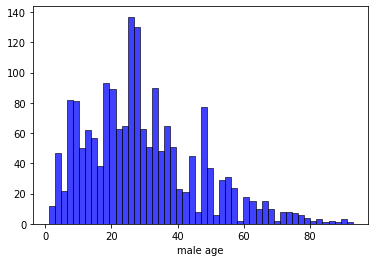

In [51]:
f = sns.histplot(male_df["age"], kde = False, bins = 50 , color = "blue")
f.set_ylabel("")
f.set_xlabel("male age")
plt.show()

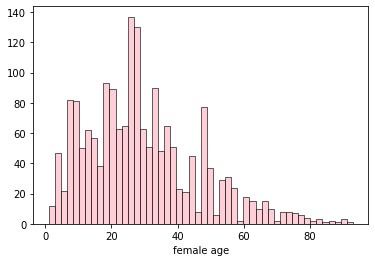

In [52]:
f = sns.histplot(male_df["age"], kde = False, bins = 50 , color = "pink")
f.set_ylabel("")
f.set_xlabel("female age")
plt.show()

### Replace strings with numerical data

In [10]:
df["sex"].value_counts()

male      1815
female     544
Name: sex, dtype: int64

In [11]:
mapping = {'male':1 , 'female':2}
df.sex = df.sex.map(mapping)

In [12]:
df["Mechanism"].value_counts()

fall standing          927
direct                 533
motorcyclists          195
fall height            170
Others(lacerationa)    125
fall stairs            118
MVA                     94
sport                   92
pedestrians             91
Cyclists                14
Name: Mechanism, dtype: int64

In [13]:
mapping = {'fall standing':1 , 
           'direct':2,
           'motorcyclists':3,
           'fall height':4,
           'Others(lacerationa)':5,
           'fall stairs':6,
           'MVA':7,
           'sport':8,
           'pedestrians':9,
           'Cyclists':10
          
          }
df.Mechanism = df.Mechanism.map(mapping)

In [14]:
df["Shoulder"].value_counts()

Dislocate                         98
clavicle fx                       10
scapula Fx                         2
anatomical neck of humerous fx     1
greater tuberosity fx              1
Name: Shoulder, dtype: int64

In [15]:
df["Shoulder"] = df["Shoulder"].astype("category")
df["Shoulder"] = df["Shoulder"].cat.set_categories(['Dislocate',
                                                    'clavicle fx',
                                                    'anatomical neck of humerous fx',
                                                    'greater tuberosity fx',
                                                    'scapula Fx',
                                                    'unkown'
                                                     ])

df.Shoulder.fillna('unkown' , inplace = True)

In [16]:
mapping = {'Dislocate':1 , 
           'clavicle fx':2,
           'anatomical neck of humerous fx':3,
           'greater tuberosity fx':4,
           'scapula Fx':5,
           'unkown':0
          }

df.Shoulder = df.Shoulder.map(mapping)

In [17]:
df["Humeros"].value_counts()

humerous shaft fx    68
Name: Humeros, dtype: int64

In [18]:
df["Humeros"] = df["Humeros"].astype("category")
df["Humeros"] = df["Humeros"].cat.set_categories(['humerous shaft fx',
                                                  'no fx'
                                                     ])

df["Humeros"].fillna('no fx' , inplace = True)

In [19]:
mapping = {'humerous shaft fx':1,
           'no fx':0
           }

df["Humeros"] = df["Humeros"].map(mapping)

In [20]:
df["elbow"].value_counts()

supra condyle fx              99
olecranon fx                  31
lateral condyle fx            23
anterior dislocation          10
head and neck of radius fx    10
medial condyle fx              3
medial epicondyle fx           2
posterior dislocation          2
coronoid process fx            1
Name: elbow, dtype: int64

In [21]:
df["elbow"] = df["elbow"].astype("category")
df["elbow"] = df["elbow"].cat.set_categories(['supra condyle fx',
                                              'olecranon fx',
                                              'lateral condyle fx',
                                              'anterior dislocation',
                                              'head and neck of radius fx',
                                              'medial condyle fx',
                                              'medial epicondyle fx',
                                              'posterior dislocation',
                                              'coronoid process fx',
                                              'no fx'
                                                     ])

df["elbow"].fillna('no fx' , inplace = True)

In [22]:
mapping = {'supra condyle fx':1,
           'olecranon fx':2,
           'lateral condyle fx' : 3,
           'anterior dislocation' : 4,
           'head and neck of radius fx' : 5,
           'medial condyle fx' : 6,
           'medial epicondyle fx' : 7,
           'posterior dislocation' : 8,
           'coronoid process fx' : 9,
           'no fx' : 0
    
}

df["elbow"] = df["elbow"].map(mapping)

In [23]:
df["forearm"].value_counts()

radius and ulnar fx    131
radius shaft fx         56
ulnar shaft fx          21
monteiia fx             19
galezi fx                6
Name: forearm, dtype: int64

In [24]:
df["forearm"] = df["forearm"].astype("category")
df["forearm"] = df["forearm"].cat.set_categories(['radius and ulnar fx',
                                                  'radius shaft fx',
                                                  'ulnar shaft fx',
                                                  'monteiia fx',
                                                  'galezi fx',
                                                  'no fx'
                                                  ])

df["forearm"].fillna('no fx' , inplace = True)

In [25]:
mapping = {'radius and ulnar fx':1,
           'radius shaft fx':2,
           'ulnar shaft fx' : 3,
           'monteiia fx' : 4,
           'galezi fx' : 5,
           'no fx' : 0    
}

df["forearm"] = df["forearm"].map(mapping)

In [26]:
df["Wrist"].value_counts()

distal of radius fx    312
scaphoid fx             13
lunate fx                4
ligament injuries        1
Name: Wrist, dtype: int64

In [27]:
df["Wrist"] = df["Wrist"].astype("category")
df["Wrist"] = df["Wrist"].cat.set_categories(['distal of radius fx',
                                              'scaphoid fx',
                                              'lunate fx',
                                              'ligament injuries',
                                              'no fx'
                                                  ])

df["Wrist"].fillna('no fx' , inplace = True)

In [28]:
mapping = {'distal of radius fx':1,
           'scaphoid fx':2,
           'lunate fx' : 3,
           'ligament injuries' : 4,
           'no fx' : 0    
}

df["Wrist"] = df["Wrist"].map(mapping)

In [29]:
df["hand"].value_counts()

phalanx fx       247
metacarpal fx    110
Name: hand, dtype: int64

In [30]:
df["hand"] = df["hand"].astype("category")
df["hand"] = df["hand"].cat.set_categories(['phalanx fx',
                                            'metacarpal fx',
                                            'no fx'
                                                  ])

df["hand"].fillna('no fx' , inplace = True)

In [31]:
mapping = {'phalanx fx':1,
           'metacarpal fx':2,
           'no fx' : 0    
}

df["hand"] = df["hand"].map(mapping)

In [32]:
df["Femor"].value_counts()

femoral shaft fx       49
neck femoral fx        49
intertrochantric fx    32
subtrochantric fx       8
lateral condyle fx      3
medial condyle fx       1
Name: Femor, dtype: int64

In [33]:
df["Femor"] = df["Femor"].astype("category")
df["Femor"] = df["Femor"].cat.set_categories(['femoral shaft fx',
                                              'neck femoral fx',
                                              'intertrochantric fx',
                                              'subtrochantric fx',
                                              'lateral condyle fx',
                                              'medial condyle fx',
                                              'no fx'
                                                     ])

df["Femor"].fillna('no fx' , inplace = True)

In [34]:
mapping = {'femoral shaft fx':1,
           'neck femoral fx':2,
           'intertrochantric fx' : 3,
           'subtrochantric fx' : 4,
           'lateral condyle fx' : 5,
           'medial condyle fx' : 6,
           'no fx' : 0
    
}

df["Femor"] = df["Femor"].map(mapping)

In [35]:
df["Knee"].value_counts()

plateau tibia fx       36
ligamental injuries    20
platella fx            19
Dislocation             6
Name: Knee, dtype: int64

In [36]:
df["Knee"] = df["Knee"].astype("category")
df["Knee"] = df["Knee"].cat.set_categories(['plateau tibia fx',
                                            'ligamental injuries',
                                            'platella fx',
                                            'Dislocation',
                                            'no fx'
                                                     ])

df["Knee"].fillna('no fx' , inplace = True)

In [37]:
mapping = {'plateau tibia fx':1,
           'ligamental injuries':2,
           'platella fx' : 3,
           'Dislocation' : 4,
           'no fx' : 0
}

df["Knee"] = df["Knee"].map(mapping)

In [38]:
df["Leg"].value_counts()

tibia fx               62
tibia and fibula fx    55
fibula fx               3
Name: Leg, dtype: int64

In [39]:
df["Leg"] = df["Leg"].astype("category")
df["Leg"] = df["Leg"].cat.set_categories(['tibia fx',
                                          'tibia and fibula fx',
                                          'fibula fx',
                                          'no fx'
                                                     ])

df["Leg"].fillna('no fx' , inplace = True)

In [40]:
mapping = {'tibia fx':1,
           'tibia and fibula fx':2,
           'fibula fx' : 3,
           'no fx' : 0
}

df["Leg"] = df["Leg"].map(mapping)

In [41]:
df["Foot"].value_counts()

phalynx fx              68
calcaneal fx            64
bimalleolar fx          61
metatarsal fx           41
medial malleolar fx     34
lateral malleolar fx    10
talus fx                10
ankle sprain             7
other tarsal bone fx     4
Name: Foot, dtype: int64

In [42]:
df["Foot"] = df["Foot"].astype("category")
df["Foot"] = df["Foot"].cat.set_categories(['phalynx fx',
                                              'calcaneal fx',
                                              'bimalleolar fx',
                                              'metatarsal fx',
                                              'medial malleolar fx',
                                              'lateral malleolar fx',
                                              'talus fx',
                                              'ankle sprain',
                                              'other tarsal bone fx',
                                              'no fx'
                                                     ])

df["Foot"].fillna('no fx' , inplace = True)

In [43]:
mapping = {'phalynx fx':1,
           'calcaneal fx':2,
           'bimalleolar fx' : 3,
           'metatarsal fx' : 4,
           'medial malleolar fx' : 5,
           'lateral malleolar fx' : 6,
           'talus fx' : 7,
           'ankle sprain' : 8,
           'other tarsal bone fx' : 9,
           'no fx' : 0
    
}

df["Foot"] = df["Foot"].map(mapping)

In [44]:
df["Amputation"].value_counts()

uper     35
lower    12
Name: Amputation, dtype: int64

In [45]:
df["Amputation"] = df["Amputation"].astype("category")
df["Amputation"] = df["Amputation"].cat.set_categories(['uper',
                                                          'lower',
                                                          'no amputation'
                                                     ])

df["Amputation"].fillna('no amputation' , inplace = True)

In [46]:
mapping = {'uper':1,
           'lower':2,
           'no amputation' : 0
}

df["Amputation"] = df["Amputation"].map(mapping)

In [47]:
df["Lumbar"].value_counts()

l1    15
L3     6
L2     4
Name: Lumbar, dtype: int64

In [48]:
df["Lumbar"] = df["Lumbar"].astype("category")
df["Lumbar"] = df["Lumbar"].cat.set_categories(['l1',
                                                'L2',
                                                'L3',
                                                'no fx'
                                                     ])

df["Lumbar"].fillna('no fx' , inplace = True)

In [49]:
mapping = {'l1': 1,
           'L2': 1,
           'L3': 1,
           'no fx' : 0
}

df["Lumbar"] = df["Lumbar"].map(mapping)

In [50]:
df["Lumbar"].value_counts()

0    2334
1      25
Name: Lumbar, dtype: int64

In [51]:
df["femorshaft"].value_counts()

femoral shaft fx    49
Name: femorshaft, dtype: int64

In [52]:
df["femorshaft"] = df["femorshaft"].astype("category")
df["femorshaft"] = df["femorshaft"].cat.set_categories(['femoral shaft fx',
                                                        'no fx'
                                                         ])

df["femorshaft"].fillna('no fx' , inplace = True)

In [53]:
mapping = {'femoral shaft fx':1,
           'no fx' : 0
}

df["femorshaft"] = df["femorshaft"].map(mapping)

In [54]:
df["pelvis"].value_counts()

sacral fx                    10
acetabular fx                 9
symphis of pubis injuries     7
sacroiiliac injuries          6
anterior dislocation          5
Name: pelvis, dtype: int64

In [55]:
df["pelvis"] = df["pelvis"].astype("category")
df["pelvis"] = df["pelvis"].cat.set_categories(['sacral fx',
                                                'acetabular fx',
                                                'symphis of pubis injuries',
                                                'sacroiiliac injuries',
                                                'anterior dislocation',
                                                'no fx'
                                                     ])

df["pelvis"].fillna('no fx' , inplace = True)

In [56]:
mapping = {'sacral fx':1,
           'acetabular fx':1,
           'symphis of pubis injuries':1,
           'sacroiiliac injuries':1,
           'anterior dislocation':0,
           'no fx' : 0
}

df["pelvis"] = df["pelvis"].map(mapping)

In [57]:
df.head()

,age,sex,Mechanism,Shoulder,Humeros,elbow,forearm,Wrist,hand,Femor,Knee,Leg,Foot,Amputation,Lumbar,femorshaft,pelvis
0,28.0,1,7,0,0,0,0,0,0,0,3,0,2,0,0,0,0
1,50.0,1,7,0,0,0,0,0,0,0,3,0,3,0,0,0,0
2,29.0,1,2,0,0,0,0,0,0,0,0,0,3,0,0,0,1
3,42.0,1,9,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,44.0,2,2,0,0,0,0,0,0,0,0,0,3,0,0,0,1


In [58]:
for column in df.columns:
    if df[column].dtype == "float64":
        df[column] = df[column].astype(int)

In [59]:
df.head()

,age,sex,Mechanism,Shoulder,Humeros,elbow,forearm,Wrist,hand,Femor,Knee,Leg,Foot,Amputation,Lumbar,femorshaft,pelvis
0,28,1,7,0,0,0,0,0,0,0,3,0,2,0,0,0,0
1,50,1,7,0,0,0,0,0,0,0,3,0,3,0,0,0,0
2,29,1,2,0,0,0,0,0,0,0,0,0,3,0,0,0,1
3,42,1,9,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,44,2,2,0,0,0,0,0,0,0,0,0,3,0,0,0,1


In [60]:
for column in df.columns[1:]:
    if df[column].dtype == "category":
        pass
    else:
        df[column] = df[column].astype("category")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 0 to 2479
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         2359 non-null   int64   
 1   sex         2359 non-null   category
 2   Mechanism   2359 non-null   category
 3   Shoulder    2359 non-null   category
 4   Humeros     2359 non-null   category
 5   elbow       2359 non-null   category
 6   forearm     2359 non-null   category
 7   Wrist       2359 non-null   category
 8   hand        2359 non-null   category
 9   Femor       2359 non-null   category
 10  Knee        2359 non-null   category
 11  Leg         2359 non-null   category
 12  Foot        2359 non-null   category
 13  Amputation  2359 non-null   category
 14  Lumbar      2359 non-null   category
 15  femorshaft  2359 non-null   category
 16  pelvis      2359 non-null   category
dtypes: category(16), int64(1)
memory usage: 77.1 KB


In [62]:
df = df.reset_index(drop=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         2359 non-null   int64   
 1   sex         2359 non-null   category
 2   Mechanism   2359 non-null   category
 3   Shoulder    2359 non-null   category
 4   Humeros     2359 non-null   category
 5   elbow       2359 non-null   category
 6   forearm     2359 non-null   category
 7   Wrist       2359 non-null   category
 8   hand        2359 non-null   category
 9   Femor       2359 non-null   category
 10  Knee        2359 non-null   category
 11  Leg         2359 non-null   category
 12  Foot        2359 non-null   category
 13  Amputation  2359 non-null   category
 14  Lumbar      2359 non-null   category
 15  femorshaft  2359 non-null   category
 16  pelvis      2359 non-null   category
dtypes: category(16), int64(1)
memory usage: 58.8 KB


## Train - Test split

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop("Mechanism", axis = 1)
y = df["Mechanism"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

In [65]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2005, 16)
X_test shape: (354, 16)
y_train shape: (2005,)
y_test shape: (354,)


In [66]:
ordinal_list = []
cat_list = [    'sex',
                'Shoulder',
                'Humeros',
                'elbow',
                'forearm',
                'Wrist',
                'hand',
                'Femor',
                'Knee',
                'Leg',
                'Foot',
                'Amputation',
                'Lumbar',
                'femorshaft',
                'pelvis'
           ]

num_list = ['age'
            ]

whole_list = cat_list + ordinal_list + num_list
whole_list

['sex',
 'Shoulder',
 'Humeros',
 'elbow',
 'forearm',
 'Wrist',
 'hand',
 'Femor',
 'Knee',
 'Leg',
 'Foot',
 'Amputation',
 'Lumbar',
 'femorshaft',
 'pelvis',
 'age']

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

full_pipeline_nom = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_list),
    ('full', StandardScaler(), whole_list) 
])

data_prepared = full_pipeline_nom.fit_transform(X_train)



data_prepared

array([[ 1.        ,  0.        ,  0.        , ..., -0.14627311,
        -0.11683386, -0.38105679],
       [ 1.        ,  0.        ,  1.        , ..., -0.14627311,
        -0.11683386, -0.17779271],
       [ 1.        ,  0.        ,  1.        , ..., -0.14627311,
        -0.11683386, -0.83840098],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.14627311,
        -0.11683386,  1.49913597],
       [ 1.        ,  0.        ,  1.        , ..., -0.14627311,
        -0.11683386,  0.38118352],
       [ 1.        ,  0.        ,  1.        , ..., -0.14627311,
        -0.11683386, -0.27942475]])

In [68]:
feature_names = np.concatenate((full_pipeline_nom.transformers_[0][1].get_feature_names_out(), num_list))
feature_names

array(['sex_1', 'sex_2', 'Shoulder_0', 'Shoulder_1', 'Shoulder_2',
       'Shoulder_3', 'Shoulder_4', 'Shoulder_5', 'Humeros_0', 'Humeros_1',
       'elbow_0', 'elbow_1', 'elbow_2', 'elbow_3', 'elbow_4', 'elbow_5',
       'elbow_6', 'elbow_7', 'elbow_8', 'elbow_9', 'forearm_0',
       'forearm_1', 'forearm_2', 'forearm_3', 'forearm_4', 'forearm_5',
       'Wrist_0', 'Wrist_1', 'Wrist_2', 'Wrist_3', 'Wrist_4', 'hand_0',
       'hand_1', 'hand_2', 'Femor_0', 'Femor_1', 'Femor_2', 'Femor_3',
       'Femor_4', 'Femor_5', 'Femor_6', 'Knee_0', 'Knee_1', 'Knee_2',
       'Knee_3', 'Knee_4', 'Leg_0', 'Leg_1', 'Leg_2', 'Leg_3', 'Foot_0',
       'Foot_1', 'Foot_2', 'Foot_3', 'Foot_4', 'Foot_5', 'Foot_6',
       'Foot_7', 'Foot_8', 'Foot_9', 'Amputation_0', 'Amputation_1',
       'Amputation_2', 'Lumbar_0', 'Lumbar_1', 'femorshaft_0',
       'femorshaft_1', 'pelvis_0', 'pelvis_1', 'age'], dtype=object)

In [69]:
X_train = pd.DataFrame(data_prepared)
X_train

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-0.381057
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-0.177793
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.607571,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-0.838401
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.607571,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-0.685953
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-0.279425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,1.304881,-0.137969,-0.102882,-0.146273,-0.116834,-0.533505
2001,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-1.397377
2002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,3.731113,-0.137969,-0.102882,-0.146273,-0.116834,1.499136
2003,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.607571,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,0.381184


### Transfrom test variable

In [70]:
data_prepared_test = full_pipeline_nom.transform(X_test)

X_test = pd.DataFrame(data_prepared_test)

X_test

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-1.143297
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-1.397377
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,2.581526,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-1.397377
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,0.381184
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,-1.041665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,2.113625,-0.137969,-0.102882,-0.146273,-0.116834,0.889344
350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,0.177919
351,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,4.539857,-0.137969,-0.102882,-0.146273,-0.116834,0.279551
352,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.389443,-0.228365,-0.168535,-0.217803,-0.312607,-0.137969,-0.102882,-0.146273,-0.116834,0.127103


## Train the models

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
y_train_pred = rf_classifier.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(conf_matrix)
print(class_report)

[[692  53  11   2   8  10   2   7   3   0]
 [ 36 364   6   3  29   4   5   6   0   0]
 [ 20  25  98   2  15   2   1   2   1   0]
 [ 40   5   9  87   1   1   1   1   0   0]
 [  3  38   1   0  61   1   2   0   0   0]
 [ 29   7   1   2   0  56   3   1   1   0]
 [  7   9   0   1   3   0  57   1   2   0]
 [ 21  13   3   0   0   2   0  39   0   0]
 [ 12   6   4   3   1   0   1   1  49   0]
 [  7   0   0   0   0   1   2   0   1   1]]
              precision    recall  f1-score   support

           1       0.80      0.88      0.84       788
           2       0.70      0.80      0.75       453
           3       0.74      0.59      0.66       166
           4       0.87      0.60      0.71       145
           5       0.52      0.58      0.54       106
           6       0.73      0.56      0.63       100
           7       0.77      0.71      0.74        80
           8       0.67      0.50      0.57        78
           9       0.86      0.64      0.73        77
          10       1.00     

In [76]:
y_test_pred = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(conf_matrix)
print(class_report)

[[83 21 11  7  4  6  4  2  1  0]
 [10 32 10  3 11  2  4  5  3  0]
 [10  6  4  2  0  2  0  2  3  0]
 [ 8  3  2  8  0  2  1  1  0  0]
 [ 1  9  1  0  8  0  0  0  0  0]
 [12  4  0  0  0  1  0  0  1  0]
 [ 6  4  0  1  1  0  1  0  1  0]
 [ 8  3  2  1  0  0  0  0  0  0]
 [ 4  1  3  1  0  1  1  0  3  0]
 [ 2  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.58      0.60      0.59       139
           2       0.39      0.40      0.39        80
           3       0.12      0.14      0.13        29
           4       0.35      0.32      0.33        25
           5       0.33      0.42      0.37        19
           6       0.07      0.06      0.06        18
           7       0.09      0.07      0.08        14
           8       0.00      0.00      0.00        14
           9       0.25      0.21      0.23        14
          10       0.00      0.00      0.00         2

    accuracy                           0.40       354
   macro avg       

/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [79]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [80]:
y_train_pred = svm_classifier.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(conf_matrix)
print(class_report)

[[604 167   5  12   0   0   0   0   0   0]
 [ 76 372   3   1   1   0   0   0   0   0]
 [ 83  64  14   4   1   0   0   0   0   0]
 [ 94  20   0  31   0   0   0   0   0   0]
 [  2 104   0   0   0   0   0   0   0   0]
 [ 76  20   0   3   0   1   0   0   0   0]
 [ 46  29   3   2   0   0   0   0   0   0]
 [ 43  30   3   1   0   0   0   1   0   0]
 [ 55  21   1   0   0   0   0   0   0   0]
 [ 11   1   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.55      0.77      0.64       788
           2       0.45      0.82      0.58       453
           3       0.48      0.08      0.14       166
           4       0.57      0.21      0.31       145
           5       0.00      0.00      0.00       106
           6       1.00      0.01      0.02       100
           7       0.00      0.00      0.00        80
           8       1.00      0.01      0.03        78
           9       0.00      0.00      0.00        77
          10       0.00     

/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
y_test_pred = svm_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(conf_matrix)
print(class_report)

[[99 35  1  4  0  0  0  0  0  0]
 [19 59  2  0  0  0  0  0  0  0]
 [17 11  1  0  0  0  0  0  0  0]
 [14  5  1  5  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [13  4  0  1  0  0  0  0  0  0]
 [ 8  5  0  0  0  1  0  0  0  0]
 [ 9  4  1  0  0  0  0  0  0  0]
 [11  3  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.52      0.71      0.60       139
           2       0.41      0.74      0.52        80
           3       0.17      0.03      0.06        29
           4       0.50      0.20      0.29        25
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00         2

    accuracy                           0.46       354
   macro avg       

/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GBM

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [83]:
y_train_pred = gbm_classifier.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(conf_matrix)
print(class_report)

[[647 110  13  11   0   2   2   0   3   0]
 [ 71 370   6   1   0   0   2   0   3   0]
 [ 58  58  42   5   0   2   1   0   0   0]
 [ 67  15   3  59   0   0   0   0   1   0]
 [ 22  77   0   0   7   0   0   0   0   0]
 [ 60  13   0   4   0  19   2   1   1   0]
 [ 25  23   1   1   0   0  24   0   5   1]
 [ 34  31   2   1   0   0   0  10   0   0]
 [ 29  14   3   0   0   0   1   0  29   1]
 [  8   0   0   0   0   0   0   0   1   3]]
              precision    recall  f1-score   support

           1       0.63      0.82      0.72       788
           2       0.52      0.82      0.64       453
           3       0.60      0.25      0.36       166
           4       0.72      0.41      0.52       145
           5       1.00      0.07      0.12       106
           6       0.83      0.19      0.31       100
           7       0.75      0.30      0.43        80
           8       0.91      0.13      0.22        78
           9       0.67      0.38      0.48        77
          10       0.60     

In [84]:
y_test_pred = gbm_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(conf_matrix)
print(class_report)

[[94 31  2  4  0  2  3  1  2  0]
 [19 52  3  2  1  0  2  0  1  0]
 [12 10  5  2  0  0  0  0  0  0]
 [12  3  1  7  0  2  0  0  0  0]
 [ 3 16  0  0  0  0  0  0  0  0]
 [14  3  1  0  0  0  0  0  0  0]
 [ 6  5  1  0  0  0  0  0  2  0]
 [ 7  5  2  0  0  0  0  0  0  0]
 [ 5  2  1  0  0  0  1  0  3  2]
 [ 2  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.54      0.68      0.60       139
           2       0.41      0.65      0.50        80
           3       0.31      0.17      0.22        29
           4       0.47      0.28      0.35        25
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        14
           9       0.38      0.21      0.27        14
          10       0.00      0.00      0.00         2

    accuracy                           0.45       354
   macro avg       

### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_train_pred = knn_classifier.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(conf_matrix)
print(class_report)

[[680  64  13   6  10   9   3   2   1   0]
 [112 307   6   2  20   3   2   0   1   0]
 [ 62  39  38   4  12   3   2   3   3   0]
 [ 82  15   5  36   3   0   2   1   1   0]
 [  9  62   1   0  32   0   2   0   0   0]
 [ 67   8   4   4   1  12   2   1   1   0]
 [ 34  19   4   4   2   0  16   0   1   0]
 [ 44  21   7   0   0   2   1   3   0   0]
 [ 39  14   3   3   2   1   7   0   8   0]
 [  7   0   0   0   0   1   3   0   1   0]]
              precision    recall  f1-score   support

           1       0.60      0.86      0.71       788
           2       0.56      0.68      0.61       453
           3       0.47      0.23      0.31       166
           4       0.61      0.25      0.35       145
           5       0.39      0.30      0.34       106
           6       0.39      0.12      0.18       100
           7       0.40      0.20      0.27        80
           8       0.30      0.04      0.07        78
           9       0.47      0.10      0.17        77
          10       0.00     

/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
y_test_pred = knn_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(conf_matrix)
print(class_report)

[[107  17   4   3   3   3   1   1   0   0]
 [ 25  32   5   2  10   2   2   1   1   0]
 [ 11   9   3   4   0   0   0   1   1   0]
 [ 11   5   3   5   1   0   0   0   0   0]
 [  1  13   1   0   4   0   0   0   0   0]
 [ 11   2   0   1   1   1   1   1   0   0]
 [  9   3   0   0   1   0   0   0   1   0]
 [ 10   2   2   0   0   0   0   0   0   0]
 [  7   1   1   0   0   1   1   0   3   0]
 [  2   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.55      0.77      0.64       139
           2       0.38      0.40      0.39        80
           3       0.16      0.10      0.12        29
           4       0.33      0.20      0.25        25
           5       0.20      0.21      0.21        19
           6       0.14      0.06      0.08        18
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        14
           9       0.50      0.21      0.30        14
          10       0.00     

/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
